#📌 Extracción

In [30]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import requests

In [31]:
response = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
data_json = response.json()

df_telecom = pd.json_normalize(data_json)

In [32]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [33]:
df_telecom.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [34]:
df_telecom.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [35]:
df_telecom['account.Charges.Total'] = pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce')

In [36]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [37]:
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [38]:
df_telecom["account.Charges.Total"] = df_telecom['account.Charges.Total'].fillna(0)

In [39]:
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [40]:
df_telecom.columns = df_telecom.columns.str.lower()

In [41]:
df_telecom.columns

Index(['customerid', 'churn', 'customer.gender', 'customer.seniorcitizen',
       'customer.partner', 'customer.dependents', 'customer.tenure',
       'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice',
       'internet.onlinesecurity', 'internet.onlinebackup',
       'internet.deviceprotection', 'internet.techsupport',
       'internet.streamingtv', 'internet.streamingmovies', 'account.contract',
       'account.paperlessbilling', 'account.paymentmethod',
       'account.charges.monthly', 'account.charges.total'],
      dtype='object')

In [42]:
df_telecom.sample()

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.onlinebackup,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total
3894,5324-KTGCG,No,Male,0,Yes,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.85,1539.75


#🔧 Transformación

In [44]:
df_telecom.sample(5)

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.onlinebackup,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total
1033,1450-GALXR,Yes,Female,0,No,No,10,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.5,1058.25
5022,6867-ACCZI,No,Female,0,Yes,Yes,24,No,No phone service,DSL,...,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,52.5,1208.15
5815,7957-RYHQD,Yes,Female,1,No,No,40,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.2,3233.85
3212,4484-CGXFK,Yes,Female,0,No,No,3,Yes,No,DSL,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.3,196.15
1400,2024-BASKD,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,74.6,74.60


In [45]:
df_telecom['cuentas_diarias'] = (df_telecom['account.charges.monthly'] / 30).round(2)

In [46]:
df_telecom[["churn", "customer.partner", "customer.dependents", "phone.phoneservice", "account.paperlessbilling"]]

,churn,customer.partner,customer.dependents,phone.phoneservice,account.paperlessbilling
0,No,Yes,Yes,Yes,Yes
1,No,No,No,Yes,No
2,Yes,No,No,Yes,Yes
3,Yes,Yes,No,Yes,Yes
4,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...
7262,No,No,No,Yes,No
7263,Yes,Yes,No,Yes,Yes
7264,No,No,No,Yes,Yes
7265,No,Yes,Yes,Yes,No


In [47]:
columnas_binarias = ["churn", "customer.partner", "customer.dependents", "phone.phoneservice", "account.paperlessbilling"]

In [48]:
df_telecom[columnas_binarias] = df_telecom[columnas_binarias].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-3443896849.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[columnas_binarias] = df_telecom[columnas_binarias].replace({'Yes': 1, 'No': 0})


In [49]:
df_telecom.head(1)

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19


In [50]:
df_telecom['churn'] = df_telecom['churn'].astype(bool)

In [51]:
df_telecom["churn"].dtype

dtype('bool')

In [52]:
df_telecom["churn"].value_counts()

,count
churn,
False,5398
True,1869


#📊 Carga y análisis

In [53]:
df_telecom.describe().round(2)

,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,account.paperlessbilling,account.charges.monthly,account.charges.total,cuentas_diarias
count,7267.00,7267.00,7267.00,7267.00,7267.0,7267.00,7267.00,7267.00,7267.00
mean,0.16,0.48,0.30,32.35,0.9,0.59,64.72,2277.18,2.16
std,0.37,0.50,0.46,24.57,0.3,0.49,30.13,2268.65,1.00
min,0.00,0.00,0.00,0.00,0.0,0.00,18.25,0.00,0.61
25%,0.00,0.00,0.00,9.00,1.0,0.00,35.42,396.20,1.18
50%,0.00,0.00,0.00,29.00,1.0,1.00,70.30,1389.20,2.34
75%,0.00,1.00,1.00,55.00,1.0,1.00,89.88,3778.52,3.00
max,1.00,1.00,1.00,72.00,1.0,1.00,118.75,8684.80,3.96


In [54]:
df_telecom.columns

Index(['customerid', 'churn', 'customer.gender', 'customer.seniorcitizen',
       'customer.partner', 'customer.dependents', 'customer.tenure',
       'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice',
       'internet.onlinesecurity', 'internet.onlinebackup',
       'internet.deviceprotection', 'internet.techsupport',
       'internet.streamingtv', 'internet.streamingmovies', 'account.contract',
       'account.paperlessbilling', 'account.paymentmethod',
       'account.charges.monthly', 'account.charges.total', 'cuentas_diarias'],
      dtype='object')

In [55]:
conteo = df_telecom['churn'].value_counts()

/tmp/ipython-input-3713920964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df_telecom, palette='viridis')


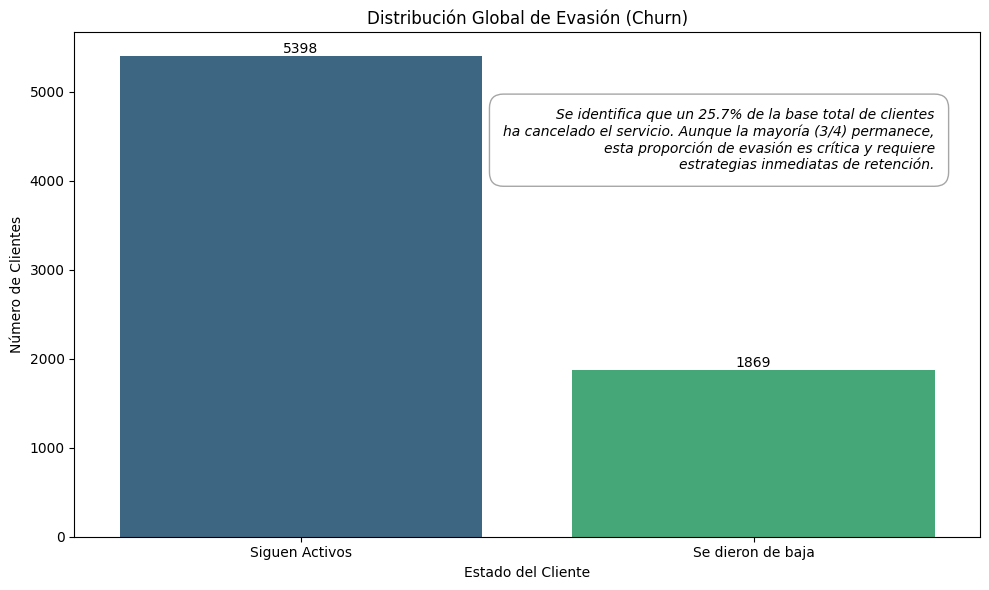

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='churn', data=df_telecom, palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

total = len(df_telecom)
bajas = df_telecom['churn'].sum()
porcentaje_bajas = (bajas / total) * 100

insight_general = (
    f"Se identifica que un {porcentaje_bajas:.1f}% de la base total de clientes\n"
    "ha cancelado el servicio. Aunque la mayoría (3/4) permanece,\n"
    "esta proporción de evasión es crítica y requiere\n"
    "estrategias inmediatas de retención."
)

plt.text(0.95, 0.85, insight_general,
         fontsize=10, fontstyle='italic',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=1'),
         ha='right', va='top', transform=ax.transAxes)

plt.title('Distribución Global de Evasión (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Siguen Activos', 'Se dieron de baja'])

plt.tight_layout()
plt.show()


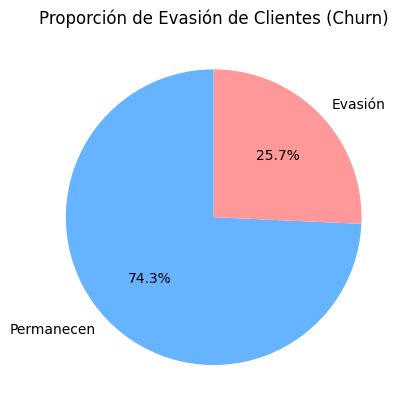

In [59]:
plt.pie(conteo, labels=['Permanecen', 'Evasión'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Evasión de Clientes (Churn)')
plt.show()

/tmp/ipython-input-483569077.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Otro segmento demográfico', 'Adultos mayores (65+)'])


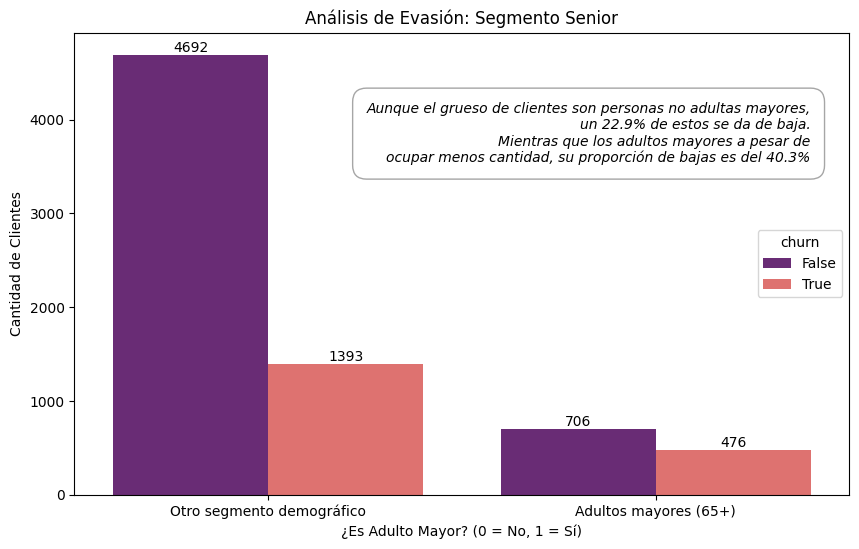

In [60]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='customer.seniorcitizen', hue='churn', data=df_telecom, palette='magma')

insight_texto = (
    "Aunque el grueso de clientes son personas no adultas mayores,\n"
    "un 22.9% de estos se da de baja.\n"
    "Mientras que los adultos mayores a pesar de\n"
    "ocupar menos cantidad, su proporción de bajas es del 40.3%"
)

plt.text(0.95, 0.85, insight_texto,
         fontsize=10,
         fontstyle='italic',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=1'),
         ha='right',
         va='top',
         transform=ax.transAxes)

plt.title('Análisis de Evasión: Segmento Senior')
plt.xlabel('¿Es Adulto Mayor? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')

for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(['Otro segmento demográfico', 'Adultos mayores (65+)'])
plt.show()

/tmp/ipython-input-615775915.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Internet DSL', 'Fibra Óptica', 'Sin Internet'])


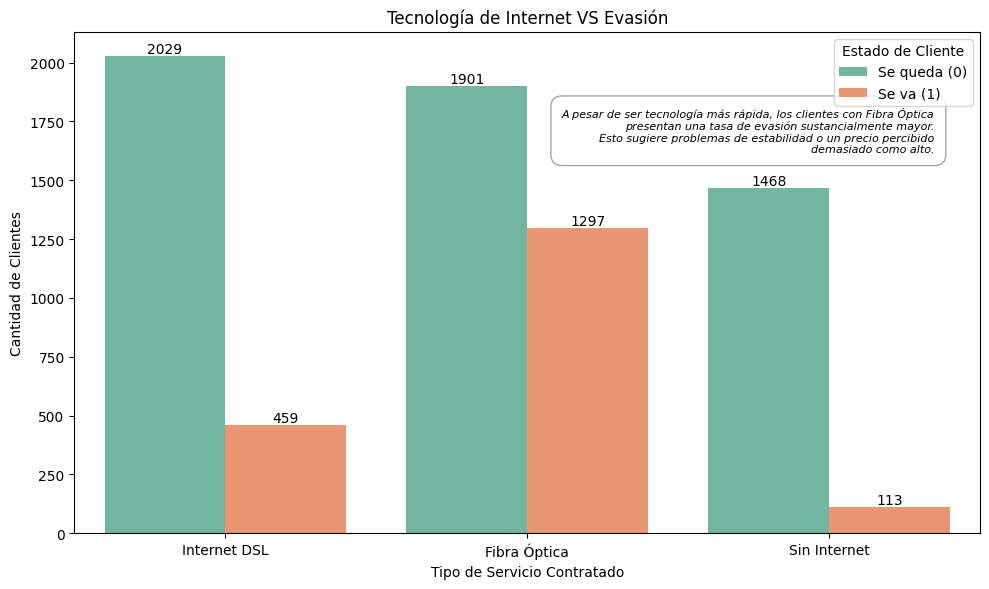

In [61]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='internet.internetservice', hue='churn', data=df_telecom, palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(['Internet DSL', 'Fibra Óptica', 'Sin Internet'])

# Nota: En este dataset, la Fibra Óptica suele tener la tasa de deserción más alta.
insight_internet = (
    "A pesar de ser tecnología más rápida, los clientes con Fibra Óptica\n"
    "presentan una tasa de evasión sustancialmente mayor.\n"
    "Esto sugiere problemas de estabilidad o un precio percibido\n"
    "demasiado como alto."
)

plt.text(0.95, 0.85, insight_internet,
         fontsize=8,
         fontstyle='italic',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=1'),
         ha='right',
         va='top',
         transform=ax.transAxes)

plt.title('Tecnología de Internet VS Evasión')
plt.xlabel('Tipo de Servicio Contratado')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Estado de Cliente', labels=['Se queda (0)', 'Se va (1)'])

plt.tight_layout()
plt.show()

/tmp/ipython-input-3925679259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y='cuentas_diarias', data=df_telecom, palette='pastel')


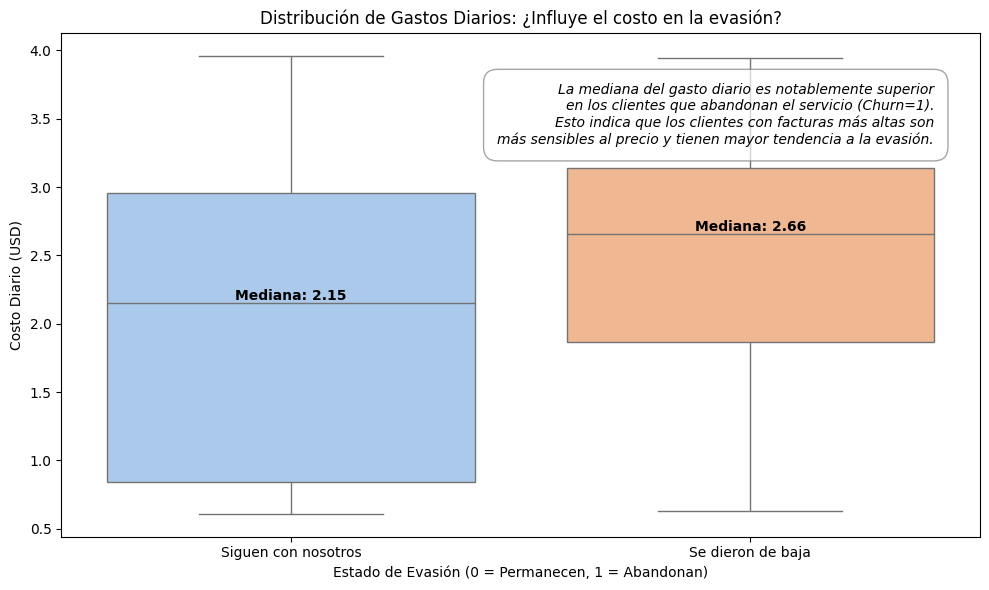

In [62]:
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='churn', y='cuentas_diarias', data=df_telecom, palette='pastel')

medianas = df_telecom.groupby('churn')['cuentas_diarias'].median()
for i, mediana in enumerate(medianas):
    plt.text(i, mediana, f'Mediana: {mediana:.2f}',
             ha='center', va='bottom', fontweight='bold', color='black')

insight_financiero = (
    "La mediana del gasto diario es notablemente superior\n"
    "en los clientes que abandonan el servicio (Churn=1).\n"
    "Esto indica que los clientes con facturas más altas son\n"
    "más sensibles al precio y tienen mayor tendencia a la evasión."
)

plt.text(0.95, 0.90, insight_financiero,
         fontsize=10, fontstyle='italic',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=1'),
         ha='right', va='top', transform=ax.transAxes)

plt.title('Distribución de Gastos Diarios: ¿Influye el costo en la evasión?')
plt.xlabel('Estado de Evasión (0 = Permanecen, 1 = Abandonan)')
plt.ylabel('Costo Diario (USD)')
plt.xticks([0, 1], ['Siguen con nosotros', 'Se dieron de baja'])

plt.tight_layout()
plt.show()

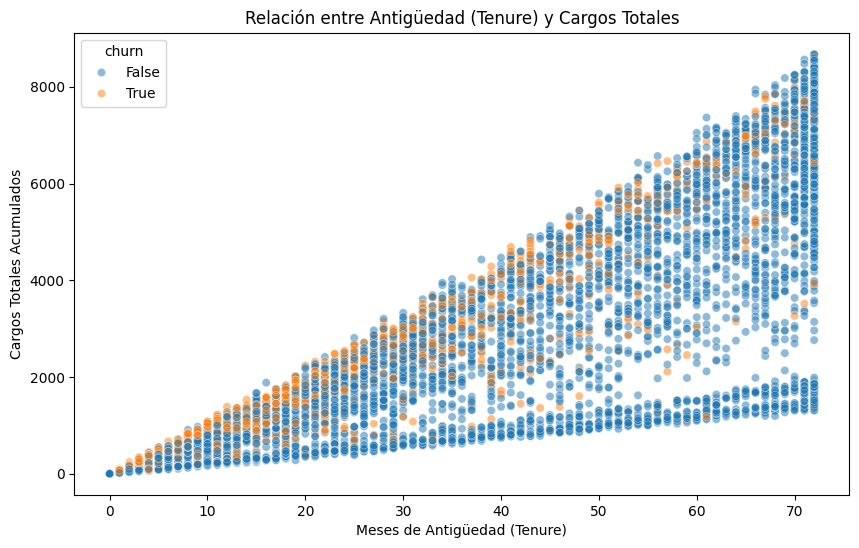

In [63]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='customer.tenure', y='account.charges.total', hue='churn', data=df_telecom, alpha=0.5)

plt.title('Relación entre Antigüedad (Tenure) y Cargos Totales')
plt.xlabel('Meses de Antigüedad (Tenure)')
plt.ylabel('Cargos Totales Acumulados')
plt.show()
# Quizá los que se quedan con planes caros creen que la antigüedad es tal que sería "inutil" cambiarse de empresa

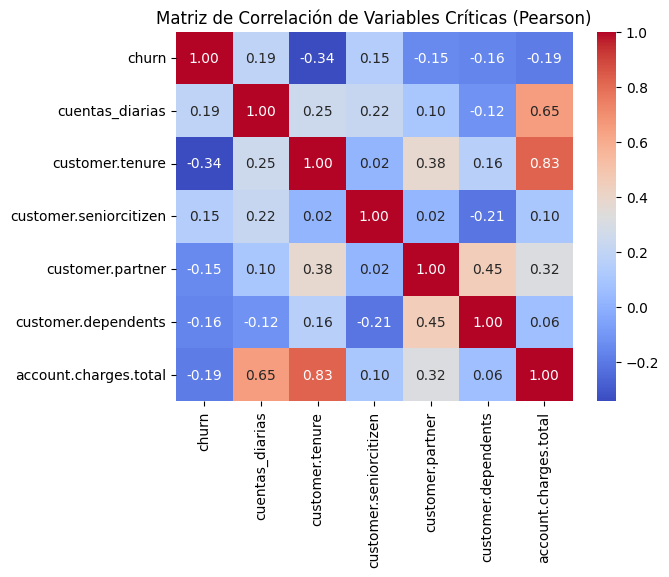

In [68]:
columnas_interes = ['churn', 'cuentas_diarias', 'customer.tenure', 'customer.seniorcitizen',
                    'customer.partner', 'customer.dependents', 'account.charges.total']
matriz_corr = df_telecom[columnas_interes].corr()

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Críticas (Pearson)')
plt.show()

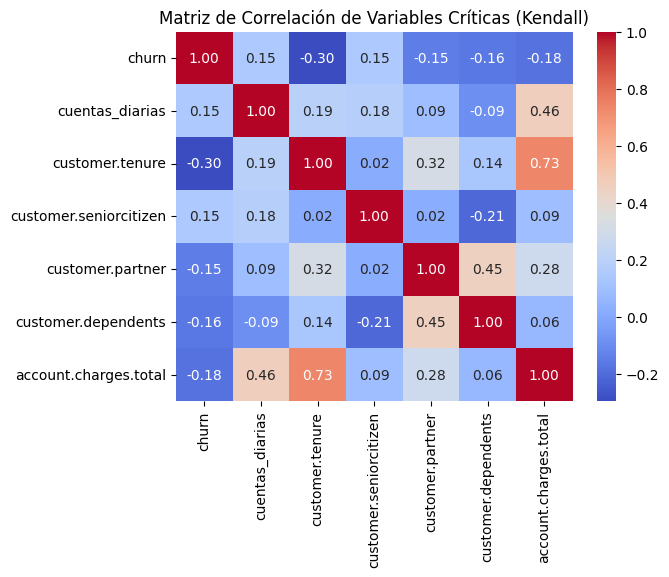

In [71]:
columnas_interes = ['churn', 'cuentas_diarias', 'customer.tenure', 'customer.seniorcitizen',
                    'customer.partner', 'customer.dependents', 'account.charges.total']
matriz_corr = df_telecom[columnas_interes].corr(method="kendall")

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Críticas (Kendall)')
plt.show()

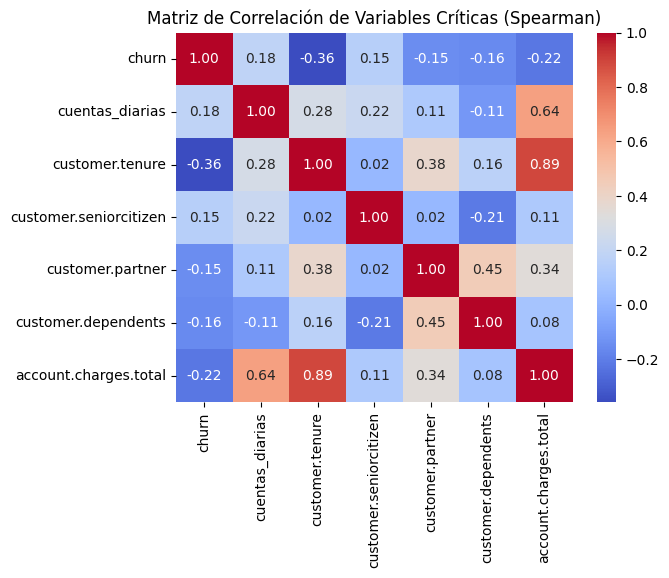

In [72]:
columnas_interes = ['churn', 'cuentas_diarias', 'customer.tenure', 'customer.seniorcitizen',
                    'customer.partner', 'customer.dependents', 'account.charges.total']
matriz_corr = df_telecom[columnas_interes].corr(method="spearman")

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Críticas (Spearman)')
plt.show()

#📄Informe final

# **Análisis: Churn de Clientes - Telecom X**

***I. Introducción***

El objetivo de este análisis es identificar los factores que detonan la evasión de clientes (Churn) en la empresa de telecomunicaciones Telecom X.

La pérdida de clientes es un fenómeno crítico para cualquier empresa, en virtud de no solo representar una disminución en los ingresos directos, sino que también incrementa los costos de adquisición de nuevos usuarios y representa un potencial riesgo de pérdida de prestigio de cara a la opinión pública por tomarse como un proveedor no confiable, caro o sin valor.

A través de este estudio se busca proporcionar al equipo de Data Science una base sólida de información para el desarrollo de, estrategias, investigaciones y modelos predictivos que permitan mitigar la pérdida de clientes, revertirla y ejecutar planes de retención y fidelización de clientes.

***II. Limpieza y Tratamiento de Datos (ETL)***

Para garantizar la integridad del análisis, se realizó un proceso de Extracción, Transformación y Carga estructurado:

2.1 Extracción:

Los datos se obtuvieron en formato JSON desde una API y se transformaron en una estructura tabular plana utilizando la función de Pandas "pd.json_normalize".

2.2 Tratamiento de Tipos:

Para gantizar la correcta manipulación de los datos, primero se convirtieron columnas de tipo cadena a numéricas (específicamente account.charges.total).

2.3 Gestión de Nulos:

Se identificaron 11 valores nulos en los cargos totales (clientes con 0 meses de antigüedad), los cuales fueron imputados con el valor $0$ para que Pandas pudiera manejar de manera correcta la columna.

2.4 Ingeniería de Variables:

Se creó la métrica "cuentas_diarias" para analizar el gasto a una escala más minuciosa. Además, se transformaron las variables categóricas de "Yes/No", que estaban en un formato de cadena (str) a formato binario (bool) "1/0" para permitir cálculos estadísticos y correlaciones.

***III. Análisis Exploratorio de Datos (EDA)***

A través de las visualizaciones hechas con matplotlib (plt) y seaborn (sns), se lograron detectar patrones clave, mismos que a continuación se describen:

3.1 Distribución General:

La tasa de evasión es significativa, concentrada principalmente en los primeros meses de relación con el cliente (Tenure bajo).

3.2 Segmento Senior:

Los adultos mayores presentan una tasa de deserción del 40.3%, casi el doble que el resto de los clientes, que en su conjunto hacen un 22.9%.

3.3 Factor Tecnológico:

Se encontró que los usuarios de Fibra Óptica se van con más frecuencia que los que están conectados por DSL, lo que sugiere una insatisfacción con el precio o la estabilidad de este servicio en lo específico.

3.4 Factor Financiero:

El gráfico de caja y bigote (Boxplot) confirmó que los clientes que abandonan la empresa tienen una mediana de gasto diario superior a los que permanecen.

***IV. Exploración de Correlación***

Para medir qué factores tienen mayor impacto, se calculó una matriz de correlación con las variables de mayor interés.

**4.1 Análisis de Correlación (Pearson, Kendall y Spearman):**

Relación Cuenta Diaria vs. Churn: Se encontró que existe una correlación positiva. A medida que aumenta el costo diario, aumenta la probabilidad de Churn, sin embargo esta correlación encontrada fue de tipo muy débil (0.19), por lo que no es de importancia estadística para su estudio.

Por otra parte, las correlaciones con mayor fuerza fueron cuentas diarias y total acumulado de cargos, con una fuerza de correlación fuerte (0.65), aunque **la de mayor trascendencia y de mayor interés que se detectó, tiene que ver entre la antigüedad y los cargos totales, con una correlación positiva muy fuerte (0.83).**

Esto confirma que el tiempo de permanencia es el factor determinante del ingreso acumulado por cliente. Por lo tanto, cualquier estrategia que aumente el 'tenure' por tan solo unos meses tendrá un impacto directo y predecible en la facturación total de la compañía.

Perder a un cliente con alto tenure es un golpe financiero mucho más significativo que perder a uno nuevo, toda vez que un cliente de 60 meses de antigüedad ha aportado proporcionalmente mucho más capital que 10 clientes nuevos. La correlación de 0.83 valida que retener es más barato y rentable que adquirir, lo que delinea por sí mismo las acciones que debe tomar la empresa.

4.2 Servicios Contratados:

Un hallazgo común es que los clientes con pocos servicios adicionales (como seguridad en línea o soporte técnico) tienden a irse más rápido; o visto de otra manera, a razón de más servicios contratados, es mayor la permanencia del cliente.

***V. Conclusiones e Insights***

El precio es un detonante: El análisis de cuentas diarias demuestra que los clientes con facturas más altas son los más propensos a abandonar.

Fidelización temprana: La correlación negativa entre tenure y churn indica que mientras más tiempo se logre retener a un cliente, menor es su probabilidad de irse.

Riesgo en Fibra Óptica: Es el servicio con mayor volumen de bajas, lo que indica un problema de competitividad o costo en ese producto.

***VI. Recomendaciones Estratégicas***

Establecer un programa de lealtad a clientes senior: Crear planes preferenciales o asistencia técnica especializada para adultos mayores para reducir su tasa de fuga del 40%. Asimismo, valdría la pena investigar la familiaridad que tienen los clientes de este segmento etario con el servicio provisto.

Auditoría de Fibra Óptica: Investigar si la alta evasión en este servicio se debe a fallas técnicas, si el precio es demasiado elevado comparado con la competencia o una mezcla de ambas causas.

Incentivos por Permanencia: Implementar descuentos automáticos o beneficios adicionales cuando el cliente cumple sus primeros 6 y 12 meses (etapa de mayor riesgo).